<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/McCulloch%20Pitts%20Neuron/Liver%20Patient%20Diagnosis/LiverPatientDiagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive/Udacity/Dataset/")
!ls

adc.json  drive  sample_data
E: Package 'python-software-properties' has no installation candidate
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
indian_liver_patient.csv  mobile.csv  perceptron.csv  student_data.csv


## Load the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split

In [3]:
patient = pd.read_csv('indian_liver_patient.csv')
print(type(patient))
print(patient.shape)

<class 'pandas.core.frame.DataFrame'>
(583, 11)


In [4]:
gender = pd.get_dummies(patient['Gender'])
patient = pd.concat([patient,gender], axis=1)

In [5]:
patient['class'] = (patient["Dataset"]==1) * 1
patient = patient.drop(['Dataset'],axis=1)
patient = patient.drop(['Gender'],axis=1)
print("Class is 1 if patient needs liver diagnosis and 0 i don't")

Class is 1 if patient needs liver diagnosis and 0 i don't


In [6]:
print(patient['class'].value_counts())
print(patient['class'].value_counts(normalize=True))

1    416
0    167
Name: class, dtype: int64
1    0.713551
0    0.286449
Name: class, dtype: float64


In [7]:
patient.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Female,Male,class
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1,1


In [8]:
X = patient[patient.columns.difference(['class'])]
Y = patient['class']

##Train Test Split

In [9]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y,random_state=1)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(583, 11) (524, 11) (59, 11)
(583,) (524,) (59,)


## Binarization

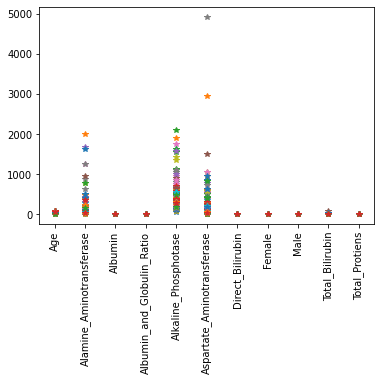

In [10]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [11]:
#X_binarised_train = X_train.apply(pd.cut,bins = 2, labels=[0,1])
#X_binarised_test = X_test.apply(pd.cut,bins = 2, labels=[0,1])

In [12]:
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels=[1,0])
X_binarised_test = X_test.apply(pd.cut,bins = 2, labels=[1,0])

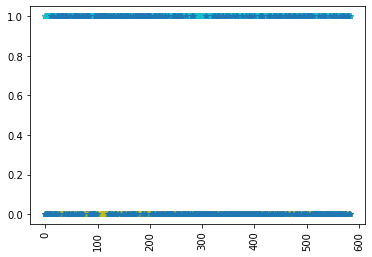

In [13]:
plt.plot(X_binarised_train,'*')
plt.xticks(rotation='vertical')
plt.show()

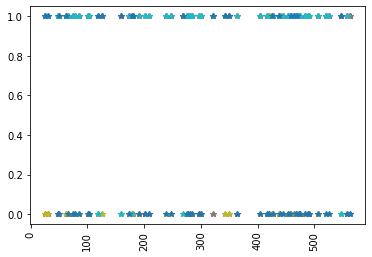

In [14]:
plt.plot(X_binarised_test,'*')
plt.xticks(rotation='vertical')
plt.show()

In [15]:
print(type(X_binarised_train))
print(type(X_binarised_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [17]:
print(type(X_binarised_train))
print(type(X_binarised_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Inference and Search

In [18]:
b = 3
i = 100 
if(np.sum(X_binarised_train[100,:])>=b):
  print("Prediction : Patient Needs Liver Diagnosis")
else:
   print("Prediction : Patient Doesn't Need Liver Diagnosis")

if(Y_train[i]==1):
  print("Ground Truth : Patient Needs Liver Diagnosis")
else:
  print("Ground Truth : Patient Doesn't Need Liver Diagnosis")

Prediction : Patient Needs Liver Diagnosis
Ground Truth : Patient Doesn't Need Liver Diagnosis


In [19]:
b = 3
i = np.random.randint(0,X_binarised_train.shape[0])

print("For row i : ",i)

if(np.sum(X_binarised_train[100,:])>=b):
  print("Prediction : Patient Needs Liver Diagnosis")
else:
   print("Prediction : Patient Doesn't Need Liver Diagnosis")

if(Y_train[i]==1):
  print("Ground Truth : Patient Needs Liver Diagnosis")
else:
  print("Ground Truth : Patient Doesn't Need Liver Diagnosis")

For row i :  306
Prediction : Patient Needs Liver Diagnosis
Ground Truth : Patient Needs Liver Diagnosis


In [20]:
b = 3
y_pred_train = []
accurate_rows = 0
for x, y in zip(X_binarised_train,Y_train):
  y_pred = np.sum(x)>=b
  y_pred_train.append(y_pred)
  accurate_rows += (y_pred == y) 

print("Accuracy is : ", accurate_rows/X_binarised_train.shape[0])

Accuracy is :  0.7156488549618321


In [21]:
for b in range(X_binarised_train.shape[1]+1):
  y_pred_train = []
  accurate_rows = 0
  for x, y in zip(X_binarised_train,Y_train):
    y_pred = np.sum(x)>=b
    y_pred_train.append(y_pred)
    accurate_rows += (y_pred == y) 
  print("b = ",b," Accuracy is : ", accurate_rows/X_binarised_train.shape[0])
  

b =  0  Accuracy is :  0.7156488549618321
b =  1  Accuracy is :  0.7156488549618321
b =  2  Accuracy is :  0.7156488549618321
b =  3  Accuracy is :  0.7156488549618321
b =  4  Accuracy is :  0.7156488549618321
b =  5  Accuracy is :  0.7156488549618321
b =  6  Accuracy is :  0.7137404580152672
b =  7  Accuracy is :  0.6984732824427481
b =  8  Accuracy is :  0.6316793893129771
b =  9  Accuracy is :  0.4580152671755725
b =  10  Accuracy is :  0.3377862595419847
b =  11  Accuracy is :  0.2862595419847328


In [22]:
b = 0
y_pred_test = []
accurate_rows = 0
for x, y in zip(X_binarised_test,Y_test):
  y_pred = np.sum(x)>=b
  y_pred_test.append(y_pred)
  accurate_rows += (y_pred == y) 

print("Accuracy is : ", accurate_rows/X_binarised_test.shape[0])

Accuracy is :  0.6949152542372882


## MP Neuron Class

In [23]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [24]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 0
Highest accuracy is 0.7156488549618321


In [25]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)
print(accuracy_test)

0.6949152542372882
